In [1]:
from datetime import datetime #para trabalhar com datas
import pandas as pd #para trabalhar com tabelas
import yfinance as yf #para coletar dados financeiros
import requests #para enviar e receber solicitações da internet
from bs4 import BeautifulSoup #coletar dados de páginas web
import matplotlib.pyplot as plt #para trabalhar com gráficos


In [2]:
url = 'https://www.fundsexplorer.com.br/ranking'

agent = {"User-Agent":"Mozilla/5.0"}
response = requests.get(url, headers = agent)

soup = BeautifulSoup(response.text, 'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table), decimal=',', thousands='.')[0]
stocks_df = df

In [3]:
symbols = stocks_df['Códigodo fundo'] + '.SA'
symbols

0      FIVN11.SA
1      BZLI11.SA
2      XTED11.SA
3      ALMI11.SA
4      PABY11.SA
         ...    
377    FLMA11.SA
378    RECT11.SA
379    MGFF11.SA
380    BREV11.SA
381    SCPF11.SA
Name: Códigodo fundo, Length: 382, dtype: object

In [4]:
start = datetime(2022, 1, 1) # 01 de janeiro de 2022
end = datetime.today() #hoje

def get_stocks(name):
  stock = yf.download(name, start=start, end=end, progress=False)
  return stock

tickers = [tick for tick in symbols]

stock_dict = {}
black_list = [] 

for tick in tickers:
    try:
        stock_dict[tick] = get_stocks(tick)
    except Exception:
        black_list.append(tick)


1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- HGRS11.SA: No data found, symbol may be delisted

1 Failed download:
- YUFI11B.SA: No data found, symbol may be delisted

1 Failed download:
- YUFI11B.SA: No data found, symbol may be delisted

1 Failed download:
- YUFI11B.SA: No data found, symbol may be delisted

1 Failed download:
- YUFI11B.SA: No data found, symbol may be delisted

1 Failed download:
- YUFI11B.SA: No data found, symbol may be delisted



In [5]:
discount_dict = {}

def calculate_discount(df):
    try:
        max_price = df['Adj Close'].describe()['75%']
        min_price = df['Adj Close'].min()
        return (min_price - max_price) / max_price
    except:
        return 0
    

for tick in stock_dict.keys():
    discount_dict[tick] = calculate_discount(stock_dict[tick])


C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_3544/4009623488.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return (min_price - max_price) / max_price


In [6]:
returns = pd.DataFrame()

for key in stock_dict.keys():
    returns[key] = stock_dict[key]['Adj Close'].pct_change()
    
returns.head()

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_3544/3108704937.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[key] = stock_dict[key]['Adj Close'].pct_change()


,FIVN11.SA,BZLI11.SA,XTED11.SA,ALMI11.SA,PABY11.SA,ORPD11.SA,GSFI11.SA,NEWU11.SA,PRSV11.SA,FAMB11B.SA,...,FISC11.SA,FATN11.SA,SNAG11.SA,JRDM11.SA,OIAG11.SA,FLMA11.SA,RECT11.SA,MGFF11.SA,BREV11.SA,SCPF11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.088452,-0.005970,-0.019108,NaN,-0.015025,0.0,-0.004425,0.000000,-0.071545,-0.011886,...,0.0,NaN,NaN,NaN,NaN,-0.004098,-0.006257,-0.001644,0.000000,0.003793
2022-01-05,-0.132075,-0.009009,-0.004870,NaN,0.015254,0.0,0.015556,0.000000,-0.019264,0.009998,...,0.0,NaN,NaN,NaN,NaN,-0.011934,-0.009581,-0.031442,0.000000,0.018892
2022-01-06,-0.043478,0.009091,0.021207,NaN,-0.015025,0.0,-0.015317,0.000000,0.000000,0.000050,...,0.0,NaN,NaN,NaN,NaN,0.002666,0.003593,0.002782,0.000000,-0.002472
2022-01-07,-0.055195,0.000000,-0.025559,NaN,0.000000,0.0,-0.004444,-0.000882,0.000000,0.002462,...,0.0,NaN,NaN,NaN,NaN,-0.003074,-0.006472,0.009712,-0.005651,-0.008674


In [7]:
def get_sector(stock):
    return [x for x in stocks_df[symbols == stock]['Setor']]

stock_info_df = pd.DataFrame.from_dict(discount_dict, orient='index').reset_index()
stock_info_df.columns = ['ticker', 'discount']
stock_info_df['sector'] = [get_sector(tick)[0] for tick in stock_info_df['ticker']]

stock_info_df

,ticker,discount,sector
0,FIVN11.SA,-0.369085,Shoppings
1,BZLI11.SA,-0.105294,Títulos e Val. Mob.
2,XTED11.SA,-0.151862,Lajes Corporativas
3,ALMI11.SA,0.000000,Lajes Corporativas
4,PABY11.SA,-0.305057,Híbrido
...,...,...,...
292,FLMA11.SA,-0.142881,Híbrido
293,RECT11.SA,-0.126826,Híbrido
294,MGFF11.SA,-0.107165,Títulos e Val. Mob.
295,BREV11.SA,-0.220116,Híbrido


In [8]:
def get_stockname(ticker):
    return [x for x in stocks_df[stocks_df['Códigodo fundo'] == ticker]['Códigodo fundo']][0]

std_list = []

for tick in stock_info_df['ticker']:
    std_list.append(returns[tick].std()) # risk metric
    
stock_info_df['risk'] = std_list
    
stock_info_df

,ticker,discount,sector,risk
0,FIVN11.SA,-0.369085,Shoppings,0.038421
1,BZLI11.SA,-0.105294,Títulos e Val. Mob.,0.016464
2,XTED11.SA,-0.151862,Lajes Corporativas,0.021474
3,ALMI11.SA,0.000000,Lajes Corporativas,NaN
4,PABY11.SA,-0.305057,Híbrido,0.105373
...,...,...,...,...
292,FLMA11.SA,-0.142881,Híbrido,0.011458
293,RECT11.SA,-0.126826,Híbrido,0.009478
294,MGFF11.SA,-0.107165,Títulos e Val. Mob.,0.010067
295,BREV11.SA,-0.220116,Híbrido,0.021713


In [23]:
def get_price_current(ticker):
    return stock_dict[str(ticker)]['Adj Close'][0]

stock_info_df['current_price'] = stock_info_df.apply(lambda x: get_price_current(ticker=x['ticker']), axis=1)
stock_info_df

,ticker,discount,sector,risk,current_price
0,FIVN11.SA,-0.369085,Shoppings,0.038421,4.070000
1,BZLI11.SA,-0.105294,Títulos e Val. Mob.,0.016464,16.750000
2,XTED11.SA,-0.151862,Lajes Corporativas,0.021474,6.280000
4,PABY11.SA,-0.305057,Híbrido,0.105373,11.980000
5,ORPD11.SA,-0.277894,Títulos e Val. Mob.,0.015267,129.720001
...,...,...,...,...,...
292,FLMA11.SA,-0.142881,Híbrido,0.011458,114.439865
293,RECT11.SA,-0.126826,Híbrido,0.009478,69.381981
294,MGFF11.SA,-0.107165,Títulos e Val. Mob.,0.010067,62.272602
295,BREV11.SA,-0.220116,Híbrido,0.021713,90.356956


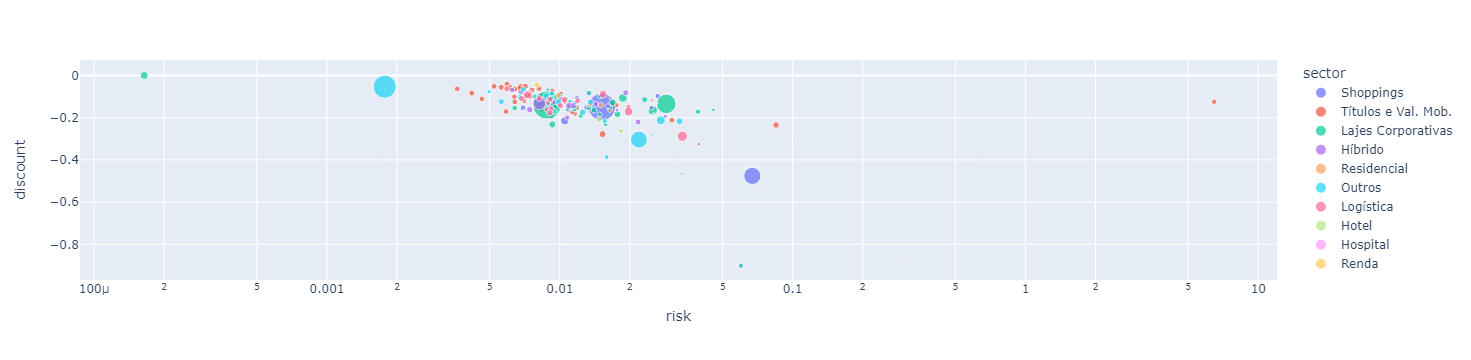

In [24]:
import plotly.express as px
stock_info_df = stock_info_df.dropna()

fig = px.scatter(stock_info_df, x = "risk", y = "discount", size = "current_price", color = "sector", hover_name = "ticker", log_x = True)
fig.show()